본 강좌에서는 케라스를 이용하여 간단한 다층 퍼셉트론 모델을 만들어보겠습니다. 다음과 같은 순서로 진행하겠습니다.

1. 문제 정의하기
1. 데이터셋 준비하기
1. 데이터셋 불러오기
1. 모델 구성하기
1. 모델 엮기
1. 모델 학습시키기
1. 모델 사용하기

---

### 문제 정의하기

다층 퍼셉트론 모델은 가장 기본적인 모델이라 대부분 문제에 적용할 수 있습니다. 본 예제에서는 비교적 쉬운 이진 분류 문제를 적용해보고자 합니다. 이진 분류 예제에 적합한 데이터셋은 8개 변수와 당뇨병 발병 유무가 기록된 '피마족 인디언 당뇨병 발병 데이터셋'이 있습니다. 이 데이터셋을 이용하여 8개 변수를 독립변수로 보고 당뇨병 발병 유무를 예측하는 이진 분류 문제로 정의해보겠습니다. 

데이터셋은 아래 링크에서 다운로드 받으실 수 있습니다.

https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

'피마족 인디언 당뇨병 발병 데이터셋'을 선정한 이유는 다음과 같습니다. 
- 인스턴스 수와 속성 수가 예제로 사용하기에 적당합니다.
- 모든 특징이 정수 혹은 실수로 되어 있어서 별도의 전처리 과정이 필요없습니다. 

데이터셋을 준비하기에 앞서, 매번 실행 시마다 결과가 달라지지 않도록 랜덤 시드를 명시적으로 지정합니다. 이것을 하지 않으면 매번 실행 시 마다 동일 모델인데도 불구하고 다른 결과가 나오기 때문에, 연구개발 단계에서 파라미터 조정이나 데이터셋에 따른 결과 차이를 보려면 랜덤 시드를 지정해주는 것이 좋습니다.

In [1]:
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

---

### 데이터셋 준비하기

위 링크에서 'pima-indians-diabetes.names'을 열어보면 데이터셋에 대한 설명이 포함되어 있습니다. 먼저 몇가지 주요 항목을 살펴보겠습니다.

- 인스턴스 수 : 768개
- 속성 수 : 8가지
- 클래스 수 : 2가지

8가지 속성(1번~8번)과 결과(9번)의 상세 내용은 다음과 같습니다. 

1. 임신 횟수
2. 경구 포도당 내성 검사에서 2시간 동안의 혈장 포도당 농도
3. 이완기 혈압 (mm Hg)
4. 삼두근 피부 두겹 두께 (mm)
5. 2 시간 혈청 인슐린 (mu U/ml)
6. 체질량 지수
7. 당뇨 직계 가족력
8. 나이 (세)
9. 5년 이내 당뇨병이 발병 여부

좀 더 살펴보면, 양성인 경우가 268개(34.9%), 음성인 경우가 500개(65.1%)입니다. 즉 모델이 모두 음성이라고 판별을 한다하더라도 65.1%의 기본 정확도(baseline accuracy)를 달성할 수 있습니다. 즉 우리의 모델이 65.1%보다 낮으면 모두 음성이라고 판별하는 것보다 낮은 정확도를 가진다고 생각하시면 됩니다. 지금까지 개발된 알고리즘의 최대 정확도는 10-fold 교차검증(cross validataion) 했을 때 77.7%이라고 웹사이트에는 표기되어 있습니다.

'pima-indians-diabetes.data'이 실제 데이터 파일입니다. 열어보면 CSV 형태로 되었습니다. CSV는 값들이 쉼표로 분리된 텍스트파일이며 메모장이나 엑셀에서 쉽게 확인할 수 있습니다.

    6,148,72,35,0,33.6,0.627,50,1
    1,85,66,29,0,26.6,0.351,31,0
    8,183,64,0,0,23.3,0.672,32,1
    1,89,66,23,94,28.1,0.167,21,0
    0,137,40,35,168,43.1,2.288,33,1    

속성별 간단한 통계 정보는 다음과 같습니다.

|No.|속성|평균|표준편차|
|-|-|-|-|
|1|임신 횟수|3.8|3.4|
|2|포도당 내성|120.9|32.0|
|3|이완기 혈압|69.1|19.4|
|4|삼두근 피부 두겹 두께|20.5|16.0|
|5|혈청 인슐린|79.8|115.2|
|6|체질량 지수|32.0|7.9|
|7|당뇨 직계 가족력|0.5|0.3|
|8|나이|33.2|11.8|

---

### 데이터셋 불러오기

csv 형식의 파일은 numpy 패키지에서 제공하는 loadtxt() 함수로 직접 불러올 수 있습니다. 데이터셋에는 속성값과 판정결과가 모두 포함되어 있기 때문에 입력(X, 속성값 8개)와 출력(Y, 판정결과 1개) 변수로 분리합니다.

In [2]:
# 데이터셋 불러오기
dataset = np.loadtxt("./warehouse/pima-indians-diabetes.data", delimiter=",")

# 입력(X)과 출력(Y) 변수로 분리하기
X = dataset[:,0:8]
Y = dataset[:,8]

---

### 모델 구성하기

앞 강좌에서 배운 Dense 레이어만을 사용하여 다층 퍼셉트론 모델을 구성할 수 있습니다. 속성이 8개이기 때문에 입력 뉴런을 8개이고, 이진 분류이기 때문에 0~1사이의 값을 나타내는 출력 뉴런이 1개입니다.

- 첫번째 Dense 레이어는 은닉층(hidden layer)으로 8개 뉴런을 입력받아 12개 뉴런을 출력합니다.
- 두번째 Dense 레이어는 은닉층으로 12개 뉴런을 입력받아 8개 뉴런을 출력합니다.
- 마지막 Dense 레이어는 출럭 레이어로 8개 뉴런을 입력받아 1개 뉴런을 출력합니다.

이 것을 앞 강좌에서 표현했던 것 처럼 레고 블럭으로 쌓아봤습니다. 총 세 개의 Dense 레이어 블럭으로 모델을 구성한 다음, 8개의 속성 값을 입력하면 1개의 출력값을 얻을 수 있는 구성입니다.

![lego](http://tykimos.github.com/Keras/warehouse/2017-2-4_MLP_Getting_Started_lego.png)

In [3]:
from keras.models import Sequential
from keras.layers import Dense

# 모델 구성하기
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

Using Theano backend.


은닉 레이어의 활성화 함수는 모두 'relu'를 사용하였고, 출력 레이어만 0과 1사이로 값이 출력될 수 있도록 활성화 함수를 'sigmoid'로 사용하였습니다. 0과 1사이의 실수값이 나오기 때문에 양성 클래스의 확률로 쉽게 매칭할 수 있습니다.

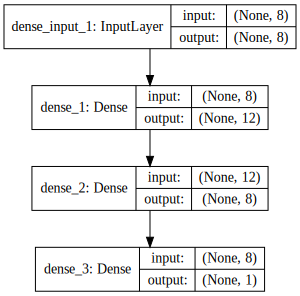

In [4]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

# 모델 구성 가시화하기
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

![model](http://tykimos.github.com/Keras/warehouse/2017-2-4_MLP_Getting_Started_model.png)

---

### 모델 엮기

모델을 정의했다면 모델을 손실함수와 최적화 알고리즘으로 엮어봅니다. 
- loss : 현재 가중치 세트를 평가하는 데 사용한 손실 함수 입니다. 이진 클래스 문제이므로 'binary_crossentropy'으로 지정합니다.
- optimizer : 최적의 가중치를 검색하는 데 사용되는 최적화 알고리즘으로 효율적인 경사 하강법 알고리즘 중 하나인 'adam'을 사용합니다.
- metrics : 평가 척도를 나타내며 분류 문제에서는 일반적으로 'accuracy'으로 지정합니다.

In [5]:
# 모델 엮기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

---

### 모델 학습시키기

모델을 학습시키기 위해서 fit() 함수를 사용합니다. 
- 첫번째 인자 : 입력 변수입니다. 8개의 속성 값을 담고 있는 X를 입력합니다.
- 두번째 인자 : 출력 변수 즉 라벨값입니다. 결과 값을 담고 았는 Y를 입력합니다.
- nb_epoch : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정합니다. 100번을 반복적으로 학습시켜 보겠습니다.
- batch_size : 가중치를 업데이트할 배치 크기를 의미하며, 10개로 지정했습니다.

In [6]:
# 모델 학습시키기
model.fit(X, Y, nb_epoch=100, batch_size=10)

Epoch 1/100
768/768 [==============================] - 0s - loss: 0.6854 - acc: 0.6211     
Epoch 2/100
768/768 [==============================] - 0s - loss: 0.6671 - acc: 0.6510     
Epoch 3/100
768/768 [==============================] - 0s - loss: 0.6550 - acc: 0.6510     
Epoch 4/100
768/768 [==============================] - 0s - loss: 0.6468 - acc: 0.6484     
Epoch 5/100
768/768 [==============================] - 0s - loss: 0.6374 - acc: 0.6602     
Epoch 6/100
768/768 [==============================] - 0s - loss: 0.6276 - acc: 0.6654     
Epoch 7/100
768/768 [==============================] - 0s - loss: 0.6173 - acc: 0.6901     
Epoch 8/100
768/768 [==============================] - 0s - loss: 0.6051 - acc: 0.6862     
Epoch 9/100
768/768 [==============================] - 0s - loss: 0.5984 - acc: 0.7005     
Epoch 10/100
768/768 [==============================] - 0s - loss: 0.5944 - acc: 0.6940     
Epoch 11/100
768/768 [==============================] - 0s - loss: 0.5934 - acc

---

### 모델 사용하기

동일한 데이터셋으로 학습한 모델을 평가해봅니다. 일반적으로 모델을 평가할 때 훈련셋과 동일한 데이터셋을 이용하지 않습니다. 모델 평가 하는 법에 대해서는 이후 강좌에서 다루겠습니다.

In [7]:
# 모델 평가하기
scores = model.evaluate(X, Y)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

 32/768 [>.............................] - ETA: 0sacc: 77.21%


77.21% 이라는 결과가 나왔습니다. 현재 튜닝도 하지 않았고 모델 평가도 제대로 된 방법으로 이루어지진 않았지만 만족할만한 수준인 것 같습니다.

---

### 전체 소스

In [8]:
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

# 데이터셋 불러오기
dataset = np.loadtxt("./warehouse/pima-indians-diabetes.data", delimiter=",")

# 입력(X)과 출력(Y) 변수로 분리하기
X = dataset[:,0:8]
Y = dataset[:,8]

from keras.models import Sequential
from keras.layers import Dense

# 모델 구성하기
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

# 모델 엮기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
model.fit(X, Y, nb_epoch=100, batch_size=10)

# 모델 평가하기
scores = model.evaluate(X, Y)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

Epoch 1/100
768/768 [==============================] - 0s - loss: 0.6854 - acc: 0.6211     
Epoch 2/100
768/768 [==============================] - 0s - loss: 0.6671 - acc: 0.6510     
Epoch 3/100
768/768 [==============================] - 0s - loss: 0.6550 - acc: 0.6510     
Epoch 4/100
768/768 [==============================] - 0s - loss: 0.6468 - acc: 0.6484     
Epoch 5/100
768/768 [==============================] - 0s - loss: 0.6374 - acc: 0.6602     
Epoch 6/100
768/768 [==============================] - 0s - loss: 0.6276 - acc: 0.6654     
Epoch 7/100
768/768 [==============================] - 0s - loss: 0.6173 - acc: 0.6901     
Epoch 8/100
768/768 [==============================] - 0s - loss: 0.6051 - acc: 0.6862     
Epoch 9/100
768/768 [==============================] - 0s - loss: 0.5984 - acc: 0.7005     
Epoch 10/100
768/768 [==============================] - 0s - loss: 0.5944 - acc: 0.6940     
Epoch 11/100
768/768 [==============================] - 0s - loss: 0.5934 - acc

---

### 결론

다층 퍼셉트론 모델을 만들어보고 실제 데이터셋을 사용하여 학습시켜봤습니다. 수치로 된 데이터를 불러오는 법과 모델에 학습시키기 위해서 간단히 가공을 해봤습니다. 또한 이진 분류 문제를 적용하기 위해서 입력 레이어와 출력 레이어를 어떻게 구성해야 하는 지도 알아봤습니다.

본 강좌를 마치기 전에 '피마족 인디언 당뇨병 발병 데이터셋'에 대해서 조금 더 알아보고자 합니다. 위 링크의 'Data Folder'안에 'costs'라는 폴더가 있는데 여기에 있는 파일에는 각 속성별로 비용이라던지 획득 시간 등의 수치 정보가 포함되어 있습니다. 먼저 costs 폴더에 어떤 파일이 있는 지 알아보겠습니다.

* pima-indians-diabetes.cost : 속성별로 테스트를 위한 비용이 캐나다 달러로 표시되어 있습니다. 
* pima-indians-diabetes.delay : 속성별로 테스트 시에 바로 결과가 나오는 지('immediate') 아니면 시간이 걸리는 지('delayed')가 표시되어 있습니다. 예를 들어 혈액 검사는 혈액을 취득 후에 실험실로 보내졌다가 다음날 의사에게 전달되기 때문에 테스트에 시간이 걸립니다.
* pima-indians-diabetes.expense : 단체로 테스트를 할 경우에는 할인이 될 수 있기 때문에, 각 속성별로 단체 할인 비용을 표시하였습니다.
* pima-indians-diabetes.group : 단체로 그룹핑할 수 있는 속성이 표기되어 있습니다.

표로 요약해봤습니다. 임신 횟수나 나이, 혈압 등은 구두로 물어보거나 측정기로 간단하게 측정할 수 있기 때문에 비용이 얼마 들지 않지만, 포도당 내성 검사나 혈청 인슐린 수치 등 혈액 검사가 필요한 것은 비용도 발생하고 테스트 결과도 즉시 알 수 없습니다. 실제로도 딥러닝을 실무에 적용하려다 보면 데이터 수집 및 판정 결과를 얻기가 쉽지 않고 비용 산정도 어려울 때가 많습니다. 기간, 비용등을 고려하여 계획을 세워야 효율적으로 데이터를 원할하게 수집할 수가 있습니다. 

|No.|속성|테스트 시간|비용(CAD)|단체할인비용(CAD)|
|:-:|:-:|:-:|-:|-:|
|1|임신 횟수|즉시|1.00|N/A|
|2|포도당 내성|지연|17.61|15.51|
|3|이완기 혈압|즉시|1.00|N/A|
|4|삼두근 피부 두겹 두께|즉시|1.00|N/A|
|5|혈청 인슐린|지연|22.78|20.68|
|6|체질량 지수|즉시|1.00|N/A|
|7|당뇨 직계 가족력|즉시|1.00|N/A|
|8|나이|즉시|1.00|N/A|

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/2017/01/27/Keras_Lecture_Contents/)
* 이전 : [딥러닝 모델 이야기/다층 퍼셉트론 레이어 이야기](https://tykimos.github.io/Keras/2017/01/27/MLP_Layer_Talk/)
* 다음 : [딥러닝 모델 이야기/컨볼루션 신경망 레이어 이야기](https://tykimos.github.io/Keras/2017/01/27/CNN_Layer_Talk/)